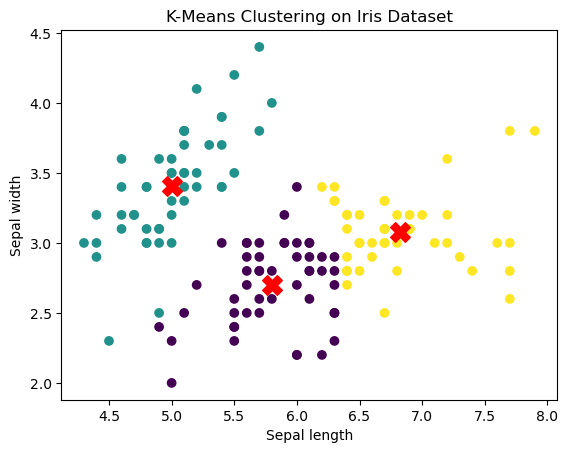

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

class KMeans:                                #定义kmeans类
    def __init__(self, n_clusters=8, max_iter=300, random_state=None):  #聚类数量、迭代次数、随机数种子
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def fit(self, X):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape                       #获取样本数和特征
        self.centroids = X[np.random.choice(n_samples, self.n_clusters, replace=False)]           #随机选取几个样本作为聚类点

        for _ in range(self.max_iter):
            labels = self._assign_labels(X)                   #给样本贴上标签，即分类
            new_centroids = self._update_centroids(X, labels)            #更新聚类点

            if np.allclose(new_centroids, self.centroids):            #判断，如果聚类点不再改变，就提前退出更新
                break

            self.centroids = new_centroids
                                                               #更新聚类点，并返回
        return self

    def _assign_labels(self, X):
        distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))             #计算到每个聚类点的欧氏距离
        return np.argmin(distances, axis=1)                                                 #返回离这个点最近的聚类点的标签

    def _update_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))                #初始化
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]        #获取聚类中的所有样本
            if len(cluster_points) > 0:            #如果现在的聚类中有样本，就把均值作为新的聚类点
                centroids[k] = np.mean(cluster_points, axis=0)
        return centroids



# 加载鸢尾花数据集
iris = load_iris()
X = iris.data[:, :2]

# 创建 K-Means 模型实例
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 调用 _assign_labels 方法获取聚类标签
labels = kmeans._assign_labels(X)

# 可视化结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='X', s=200, c='red')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('K-Means Clustering on Iris Dataset')
plt.show()
